In [1]:
import cv2
import numpy as np
import os
import time
import mediapipe as mp
import matplotlib
import matplotlib.pyplot as plt

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, results  

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness = 1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness = 1, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness = 2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness = 2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness = 2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness = 2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness = 2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness = 2, circle_radius=2)
                             )
    
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data2') 

# Actions that we try to detect
actions = np.array(['A', 'B', 'C','D', 'E', 'F','G', 'H', 'I','J', 'K', 'L','M', 'N', 'O','P', 'Q', 'R','S', 'T', 'U','V', 'W', 'X','Y', 'Z'])

# Thirty videos worth of data
no_sequences = 19

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# for action in actions: 
#     for sequence in range(no_sequences):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass

In [2]:
counter = 0 
length2 = sequence_length
index = 1
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
     for action in actions:
        counter = 0
        length2 = sequence_length
        path = 'dataset/video/' + action + '/2.webm'
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            cap = cv2.VideoCapture(path)
            length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            counter += 3
            if length > sequence_length+counter:
                length2 = sequence_length+counter
            else:
                counter = 0
                length2 = sequence_length+counter
            cap.set(cv2.CAP_PROP_POS_FRAMES, counter)
#             cap.set(counter,length2);
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
        
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
    
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

        cap.release()
        cv2.destroyAllWindows()

KeyboardInterrupt: 

per gambar dijadiin 30 frame

In [4]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(1, no_sequences):
            path = 'dataset/gambar/training/' + str(action) + '/'+ str(action) + ' (' + str(sequence) + ').jpg'
            frame = cv2.imread(path)
            scale_percent = 60 # percent of original size
            width = int(frame.shape[1] * scale_percent / 100)
            height = int(frame.shape[0] * scale_percent / 100)
            dim = (width, height)
            frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)


                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break


KeyboardInterrupt: 

smua gambar jd 1 video

In [3]:
with mp_holistic.Holistic(min_detection_confidence=0.2, min_tracking_confidence=0.2) as holistic:
    for action in actions:
        # Loop through sequences aka videos
        sequence = 1
        # Loop through video length aka sequence length
        for frame_num in range(1,no_sequences):
            # Make detections
            path = 'dataset/gambar/training/' + str(action) + '/'+ str(action) + ' (' + str(frame_num) + ').jpg'
            frame = cv2.imread(path)
            scale_percent = 60 # percent of original size
            width = int(frame.shape[1] * scale_percent / 100)
            height = int(frame.shape[0] * scale_percent / 100)
            dim = (width, height)
            frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            if frame_num == 0: 
                cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(500)
            else: 
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)


            # NEW Export keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break


KeyboardInterrupt: 

cobak2

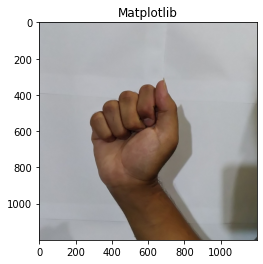

In [2]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    frame = cv2.imread('dataset/gambar/training/A/A (15).jpg')
    scale_percent = 60 # percent of original size
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    image, results = mediapipe_detection(frame, holistic)

    # Draw landmarks
    draw_styled_landmarks(image, results)

    cv2.imshow('OpenCV Feed', image)
    cv2.waitKey(500)

#Display image using matplotlib (Works)
b,g,r = cv2.split(frame)
frame_rgb = cv2.merge((r,g,b))
plt.imshow(frame_rgb)
plt.title('Matplotlib') #Give this plot a title, 
                        #so I know it's from matplotlib and not cv2
plt.show()

6. PREPROCESS DATA AND CREATE LABELS FEATURES

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [5]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [6]:
np.array(sequences).shape

(780, 30, 1662)

In [7]:
np.array(labels).shape #ambil angka yang menandakan ini gaya apa (0 = hello, 1 = thanks, 2 = i love you)

(780,)

In [8]:
X = np.array(sequences)

In [9]:
X.shape #total 90 video, per video punya 30 frame, per frame punya 1662 titik/keypoints

(780, 30, 1662)

In [10]:
y = to_categorical(labels).astype(int)

In [11]:
y.shape

(780, 26)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [13]:
y_test.shape

(39, 26)

7. BUILD AND TRAIN LSTM NEURAL NETWORK

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [15]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [16]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
24/24 [==============================] - 3s 61ms/step - loss: 3.3794 - categorical_accuracy: 0.0409
Epoch 2/2000
24/24 [==============================] - 1s 49ms/step - loss: 3.2666 - categorical_accuracy: 0.0314
Epoch 3/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2584 - categorical_accuracy: 0.0434
Epoch 4/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2580 - categorical_accuracy: 0.0393
Epoch 5/2000
24/24 [==============================] - 1s 49ms/step - loss: 3.2588 - categorical_accuracy: 0.0311
Epoch 6/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2583 - categorical_accuracy: 0.0363
Epoch 7/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2578 - categorical_accuracy: 0.0449
Epoch 8/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2585 - categorical_accuracy: 0.0380
Epoch 9/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2584 - categorical_

24/24 [==============================] - 1s 45ms/step - loss: 3.2581 - categorical_accuracy: 0.0475
Epoch 143/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2584 - categorical_accuracy: 0.0439
Epoch 144/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2577 - categorical_accuracy: 0.0418
Epoch 145/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2581 - categorical_accuracy: 0.0396
Epoch 146/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2587 - categorical_accuracy: 0.0337
Epoch 147/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2579 - categorical_accuracy: 0.0411
Epoch 148/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2561 - categorical_accuracy: 0.0457
Epoch 149/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2572 - categorical_accuracy: 0.0490
Epoch 150/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2604 - categoric

24/24 [==============================] - 1s 46ms/step - loss: 3.2590 - categorical_accuracy: 0.0401
Epoch 283/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2555 - categorical_accuracy: 0.0464
Epoch 284/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2563 - categorical_accuracy: 0.0418
Epoch 285/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2586 - categorical_accuracy: 0.0374
Epoch 286/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2561 - categorical_accuracy: 0.0410
Epoch 287/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2571 - categorical_accuracy: 0.0351
Epoch 288/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2565 - categorical_accuracy: 0.0372
Epoch 289/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2564 - categorical_accuracy: 0.0378
Epoch 290/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2560 - categoric

Epoch 353/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2604 - categorical_accuracy: 0.0386
Epoch 354/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2582 - categorical_accuracy: 0.0455
Epoch 355/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2602 - categorical_accuracy: 0.0323
Epoch 356/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2574 - categorical_accuracy: 0.0377
Epoch 357/2000
24/24 [==============================] - 1s 50ms/step - loss: 3.2547 - categorical_accuracy: 0.0301
Epoch 358/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2597 - categorical_accuracy: 0.0286
Epoch 359/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2564 - categorical_accuracy: 0.0461
Epoch 360/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2582 - categorical_accuracy: 0.0328
Epoch 361/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2

Epoch 423/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2568 - categorical_accuracy: 0.0334
Epoch 424/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2562 - categorical_accuracy: 0.0490
Epoch 425/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2565 - categorical_accuracy: 0.0449 0s - loss: 3.2560 - categorical_accura
Epoch 426/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2578 - categorical_accuracy: 0.0484
Epoch 427/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2562 - categorical_accuracy: 0.0470
Epoch 428/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2582 - categorical_accuracy: 0.0309
Epoch 429/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2576 - categorical_accuracy: 0.0501
Epoch 430/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2567 - categorical_accuracy: 0.0362
Epoch 431/2000
24/24 [===================

24/24 [==============================] - 1s 47ms/step - loss: 3.2595 - categorical_accuracy: 0.0311
Epoch 565/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2575 - categorical_accuracy: 0.0328
Epoch 566/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2606 - categorical_accuracy: 0.0405
Epoch 567/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2567 - categorical_accuracy: 0.0418
Epoch 568/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2568 - categorical_accuracy: 0.0425
Epoch 569/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2593 - categorical_accuracy: 0.0484
Epoch 570/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2577 - categorical_accuracy: 0.0377
Epoch 571/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2573 - categorical_accuracy: 0.0356
Epoch 572/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2573 - categoric

24/24 [==============================] - 1s 46ms/step - loss: 3.2575 - categorical_accuracy: 0.0432
Epoch 706/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2576 - categorical_accuracy: 0.0461
Epoch 707/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2576 - categorical_accuracy: 0.0540
Epoch 708/2000
24/24 [==============================] - 1s 45ms/step - loss: 3.2590 - categorical_accuracy: 0.0360
Epoch 709/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2561 - categorical_accuracy: 0.0567
Epoch 710/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2549 - categorical_accuracy: 0.0293
Epoch 711/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2579 - categorical_accuracy: 0.0488
Epoch 712/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2583 - categorical_accuracy: 0.0361
Epoch 713/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2571 - categoric

24/24 [==============================] - 1s 47ms/step - loss: 3.2555 - categorical_accuracy: 0.0325 0s - loss: 3.2551 - categorical_accuracy: 0.
Epoch 847/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2593 - categorical_accuracy: 0.0327
Epoch 848/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2561 - categorical_accuracy: 0.0496
Epoch 849/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2597 - categorical_accuracy: 0.0494
Epoch 850/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2589 - categorical_accuracy: 0.0413
Epoch 851/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2571 - categorical_accuracy: 0.0349
Epoch 852/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2566 - categorical_accuracy: 0.0410
Epoch 853/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2573 - categorical_accuracy: 0.0446
Epoch 854/2000
24/24 [============================

24/24 [==============================] - 1s 47ms/step - loss: 3.2577 - categorical_accuracy: 0.0358
Epoch 987/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2561 - categorical_accuracy: 0.0385
Epoch 988/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2581 - categorical_accuracy: 0.0364
Epoch 989/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2571 - categorical_accuracy: 0.0389
Epoch 990/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2572 - categorical_accuracy: 0.0450
Epoch 991/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2575 - categorical_accuracy: 0.0401 0s - loss: 3.2573 - categorical_ac
Epoch 992/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2597 - categorical_accuracy: 0.0339
Epoch 993/2000
24/24 [==============================] - 1s 46ms/step - loss: 3.2555 - categorical_accuracy: 0.0449
Epoch 994/2000
24/24 [==============================] - 1s 4

24/24 [==============================] - 1s 46ms/step - loss: 3.2572 - categorical_accuracy: 0.0405
Epoch 1127/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2569 - categorical_accuracy: 0.0395
Epoch 1128/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2582 - categorical_accuracy: 0.0309
Epoch 1129/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2580 - categorical_accuracy: 0.0386
Epoch 1130/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2586 - categorical_accuracy: 0.0327
Epoch 1131/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2581 - categorical_accuracy: 0.0407
Epoch 1132/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2570 - categorical_accuracy: 0.0411
Epoch 1133/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2564 - categorical_accuracy: 0.0427
Epoch 1134/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2570 - c

24/24 [==============================] - 1s 47ms/step - loss: 3.2565 - categorical_accuracy: 0.0409
Epoch 1265/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2578 - categorical_accuracy: 0.0412
Epoch 1266/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2570 - categorical_accuracy: 0.0380
Epoch 1267/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2586 - categorical_accuracy: 0.0510
Epoch 1268/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2612 - categorical_accuracy: 0.0355
Epoch 1269/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2563 - categorical_accuracy: 0.0483
Epoch 1270/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2551 - categorical_accuracy: 0.0491
Epoch 1271/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2605 - categorical_accuracy: 0.0395
Epoch 1272/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2583 - c

24/24 [==============================] - 1s 48ms/step - loss: 3.2598 - categorical_accuracy: 0.0455
Epoch 1405/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2581 - categorical_accuracy: 0.0317
Epoch 1406/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2566 - categorical_accuracy: 0.0469
Epoch 1407/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2570 - categorical_accuracy: 0.0462
Epoch 1408/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2576 - categorical_accuracy: 0.0335 0s - loss: 3.2575 - categorical_accura
Epoch 1409/2000
24/24 [==============================] - 1s 49ms/step - loss: 3.2597 - categorical_accuracy: 0.0313
Epoch 1410/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2576 - categorical_accuracy: 0.0389
Epoch 1411/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2562 - categorical_accuracy: 0.0329
Epoch 1412/2000
24/24 [==========================

24/24 [==============================] - 1s 49ms/step - loss: 3.2578 - categorical_accuracy: 0.0366
Epoch 1475/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2574 - categorical_accuracy: 0.0437
Epoch 1476/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2560 - categorical_accuracy: 0.0488
Epoch 1477/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2560 - categorical_accuracy: 0.0493
Epoch 1478/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2591 - categorical_accuracy: 0.0510
Epoch 1479/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2561 - categorical_accuracy: 0.0389
Epoch 1480/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2575 - categorical_accuracy: 0.0348
Epoch 1481/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2559 - categorical_accuracy: 0.0409
Epoch 1482/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2574 - c

24/24 [==============================] - 1s 48ms/step - loss: 3.2556 - categorical_accuracy: 0.0481
Epoch 1615/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2577 - categorical_accuracy: 0.0375
Epoch 1616/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2559 - categorical_accuracy: 0.0481
Epoch 1617/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2543 - categorical_accuracy: 0.0437
Epoch 1618/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2587 - categorical_accuracy: 0.0367
Epoch 1619/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2585 - categorical_accuracy: 0.0352
Epoch 1620/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2592 - categorical_accuracy: 0.0416
Epoch 1621/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2573 - categorical_accuracy: 0.0389
Epoch 1622/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2577 - c

24/24 [==============================] - 1s 48ms/step - loss: 3.2583 - categorical_accuracy: 0.0328
Epoch 1754/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2556 - categorical_accuracy: 0.0348
Epoch 1755/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2588 - categorical_accuracy: 0.0396
Epoch 1756/2000
24/24 [==============================] - 1s 49ms/step - loss: 3.2560 - categorical_accuracy: 0.0372
Epoch 1757/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2556 - categorical_accuracy: 0.0409
Epoch 1758/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2580 - categorical_accuracy: 0.0429
Epoch 1759/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2593 - categorical_accuracy: 0.0377
Epoch 1760/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2566 - categorical_accuracy: 0.0441
Epoch 1761/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2584 - c

24/24 [==============================] - 1s 48ms/step - loss: 3.2574 - categorical_accuracy: 0.0430
Epoch 1894/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2583 - categorical_accuracy: 0.0315
Epoch 1895/2000
24/24 [==============================] - 1s 49ms/step - loss: 3.2569 - categorical_accuracy: 0.0385
Epoch 1896/2000
24/24 [==============================] - 1s 47ms/step - loss: 3.2587 - categorical_accuracy: 0.0385
Epoch 1897/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2565 - categorical_accuracy: 0.0297
Epoch 1898/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2553 - categorical_accuracy: 0.0386
Epoch 1899/2000
24/24 [==============================] - 1s 48ms/step - loss: 3.2588 - categorical_accuracy: 0.0333
Epoch 1900/2000
24/24 [==============================] - 1s 49ms/step - loss: 3.2584 - categorical_accuracy: 0.0358
Epoch 1901/2000
24/24 [==============================] - 1s 49ms/step - loss: 3.2565 - c

In [19]:
model.save('modelawal.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                858       
Total params: 597,434
Trainable params: 597,434
Non-trainable params: 0
__________________________________________________

8. MAKE PREDICTIONS

In [20]:
res = model.predict(X_test)

In [21]:
actions[np.argmax(res[4])]

'N'

In [22]:
actions[np.argmax(y_test[4])]

'Y'

10. EVALUATION USING CONFUSION MATRIX AND ACCURACY

In [23]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [24]:
yhat = model.predict(X_test)

In [25]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [26]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[37.,  0.],
        [ 2.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[34.,  0.],
        [ 5.,  0.]],

       [[36.,  0.],
        [ 3.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[37.,  0.],
        [ 2.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[37.,  0.],
        [ 2.,  0.]],

       [[ 0., 39.],
        [ 0.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[36.,  0.],
        [ 3.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[36.,  0.],
        [ 3.,  0.]],

       [[35.,  0.],
        [ 4.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]],

       [[37.,  0.],
        [ 2.,  0.]],

       [[38.,  0.],
        [ 1.,  0.]]])

In [27]:
accuracy_score(ytrue, yhat)

0.0

11. TEST IN REAL TIME

In [1]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [2]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cv2' is not defined